# Final Group Project
# Reducing Flight Delays Through Data-Driven Analysis: Improving U.S. Airline Operational Efficiency
# Group 1: Aishwarya Gopal, Andrey Martynenko, Debjani Sarma, Dushyanth Asrani Gopal, Saketh Polavarapu
# EDA and Descriptive Analysis of Airline Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

path = os.path.expanduser('~/Desktop/Group 1 - EIS Final Project/cleaned_flights.csv')
df = pd.read_csv(path)
df.head()

,FL_DATE,AIRLINE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,...,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,Cancelled_Flag
0,2019-01-09,United Air Lines Inc.,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151.0,-4.0,...,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN,0
1,2022-11-19,Delta Air Lines Inc.,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,...,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN,0
2,2022-07-22,United Air Lines Inc.,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,6.0,...,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN,0
3,2023-03-06,Delta Air Lines Inc.,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,-1.0,...,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0,0
4,2020-02-23,Spirit Air Lines,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838.0,-2.0,...,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN,0


In [4]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
df['Month_Year'] = df['FL_DATE'].dt.to_period('M')
df['DayOfWeek'] = df['FL_DATE'].dt.day_name()

In [6]:
desc_stats = df[['DEP_DELAY', 'ARR_DELAY', 'TAXI_OUT', 'TAXI_IN', 'DISTANCE']].describe()
print("Descriptive Stats (Delays, Taxi, Distance):\n", desc_stats)

Descriptive Stats (Delays, Taxi, Distance):
           DEP_DELAY     ARR_DELAY      TAXI_OUT       TAXI_IN      DISTANCE
count  2.913802e+06  2.913802e+06  2.913802e+06  2.913802e+06  2.913802e+06
mean   1.005009e+01  4.260858e+00  1.663613e+01  7.673592e+00  8.107197e+02
std    4.904988e+01  5.117482e+01  9.179614e+00  6.252051e+00  5.893703e+02
min   -9.000000e+01 -9.600000e+01  1.000000e+00  1.000000e+00  2.900000e+01
25%   -6.000000e+00 -1.600000e+01  1.100000e+01  4.000000e+00  3.780000e+02
50%   -2.000000e+00 -7.000000e+00  1.400000e+01  6.000000e+00  6.530000e+02
75%    6.000000e+00  7.000000e+00  1.900000e+01  9.000000e+00  1.047000e+03
max    2.966000e+03  2.934000e+03  1.840000e+02  2.490000e+02  5.812000e+03


Most flights depart and arrive on time or slightly early, but extreme outliers (up to ~2900 mins) inflate the  Avg_delay.
Taxi-out times (~17 mins) are longer than taxi-in (~8 mins), and delay patterns vary across both short and long-haul routes.

JetBlue Airways
JetBlue has the highest departure delay (18.1 min) and worst carrier delay (31.5 min), despite flying long routes — signaling internal inefficiencies and tight scheduling buffers.

Frontier, Allegiant, Spirit
These low-cost carriers show high delays and moderate distances, suggesting limited turnaround flexibility and underinvestment in ground operations.

Delta, Alaska, PSA
These airlines maintain low delays and high punctuality, indicating strong operational control, efficient aircraft rotation, and reliable scheduling.

Frontier’s Cancellation Rate
Frontier leads in cancellations (~11%) — a red flag for route reliability and customer trust, likely due to over-scheduling or staffing limitations.

In [9]:
worst_airports = df.groupby("ORIGIN")["DEP_DELAY"].mean().sort_values(ascending=False).head(10)
print("Top 10 Worst Airports by Departure Delay:", worst_airports.round(2))

Top 10 Worst Airports by Departure Delay: ORIGIN
PPG    58.97
SMX    36.27
PSM    31.11
PGV    28.89
HGR    27.57
PIB    26.17
ASE    25.79
ART    25.44
OGS    25.06
HYA    24.43
Name: DEP_DELAY, dtype: float64


Insights: Smaller or regional airports like PPG, SMX, and PSM experience disproportionately high average departure delays, exceeding 30–50 minutes.These delays may stem from limited ground resources, fewer backup aircraft, or restricted gate access, especially under weather or congestion pressure.

/var/folders/jr/yp0g4m2149b5m5_ty9fdx9s00000gn/T/ipykernel_3500/3253084718.py:10: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


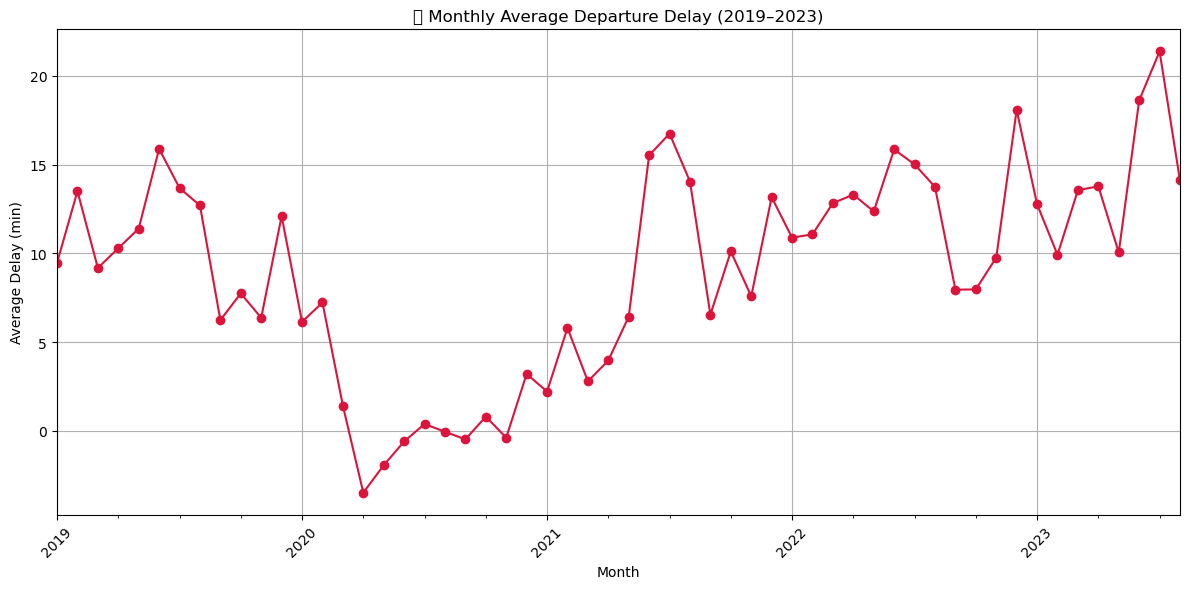

In [14]:
monthly_trend = df.groupby("Month_Year")["DEP_DELAY"].mean()

plt.figure(figsize=(12, 6))
monthly_trend.plot(marker='o', color='crimson')
plt.title("📈 Monthly Average Departure Delay (2019–2023)")
plt.ylabel("Average Delay (min)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

Departure delays saw significant increases in late 2022 and early 2023, likely driven by the rapid rebound in passenger demand post-COVID, combined with ongoing airline staffing shortages and airport congestion.

Don’t just expect summer or holiday peaks — even post-crisis recovery phases require proactive planning.

/var/folders/jr/yp0g4m2149b5m5_ty9fdx9s00000gn/T/ipykernel_3500/768655634.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dow_delay.index, y=dow_delay.values, palette=colors)


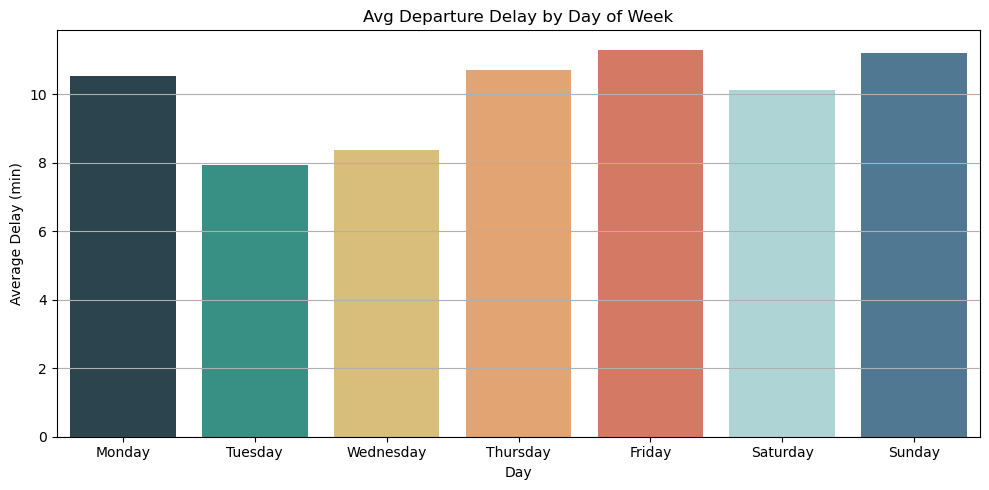

In [17]:
import seaborn as sns
dow_delay = df.groupby("DayOfWeek")["DEP_DELAY"].mean().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
])
colors = ["#264653", "#2a9d8f", "#e9c46a", "#f4a261", "#e76f51", "#a8dadc", "#457b9d"]
plt.figure(figsize=(10, 5))
sns.barplot(x=dow_delay.index, y=dow_delay.values, palette=colors)
plt.title("Avg Departure Delay by Day of Week")
plt.ylabel("Average Delay (min)")
plt.xlabel("Day")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

From the above graph we can see that delays are highest on Sunday's and Friday's:

Friday and Sunday show the highest average delays, likely due to weekend travel peaks and increased air traffic volume. This suggests operational strain during leisure travel heavy periods.

# Competitive Analysis: Airline Reliability & Delay Comparison

In [21]:
airline_perf = df.groupby('AIRLINE').agg({
    'Cancelled_Flag': 'mean',
    'DEP_DELAY': 'mean',
    'ARR_DELAY': 'mean',
    'DISTANCE': 'mean',
    'DELAY_DUE_CARRIER': 'mean',
    'DELAY_DUE_LATE_AIRCRAFT': 'mean'
}).rename(columns={
    'Cancelled_Flag': 'Cancellation Rate',
    'DEP_DELAY': 'Avg Departure Delay',
    'ARR_DELAY': 'Avg Arrival Delay',
    'DISTANCE': 'Avg Distance',
    'DELAY_DUE_CARRIER': 'Carrier Delay',
    'DELAY_DUE_LATE_AIRCRAFT': 'Late Aircraft Delay'
}).sort_values(by='Avg Departure Delay', ascending=False)

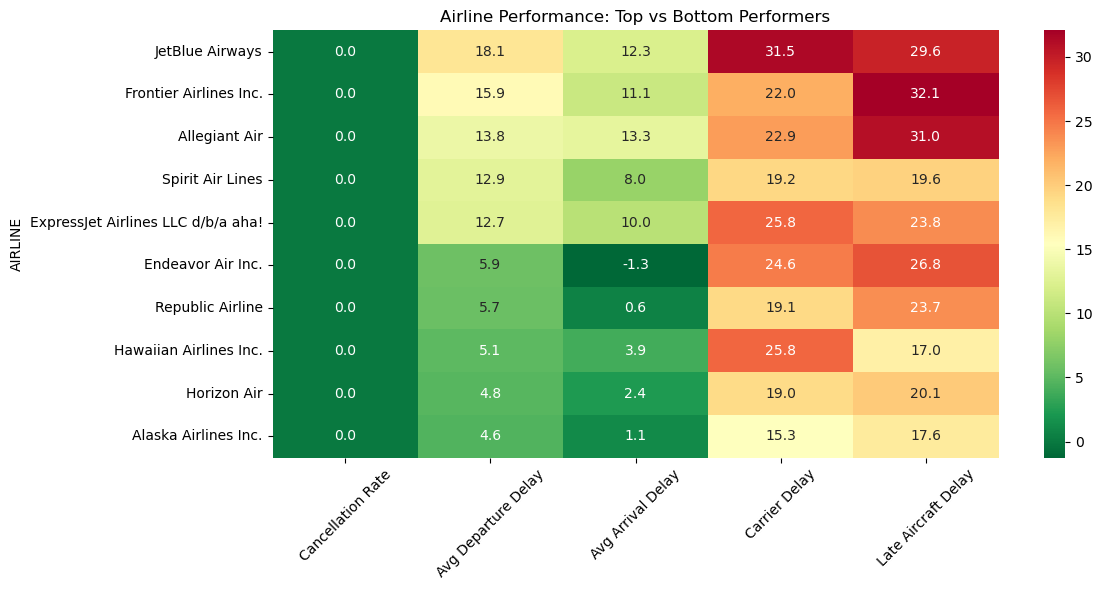

In [23]:
# Visual: Top 5 and Bottom 5 airlines
top5 = airline_perf.head(5)
bottom5 = airline_perf.tail(5)
compare_df = pd.concat([top5, bottom5])

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(compare_df.drop(columns=["Avg Distance"]), annot=True, cmap="RdYlGn_r", fmt=".1f")
plt.title("Airline Performance: Top vs Bottom Performers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Competitive Analysis Insights (Top vs Bottom Airlines):

JetBlue and Frontier show the highest average departure delays (18.1 and 15.9 mins) along with very high carrier/late aircraft delay components (>29 mins), suggesting operational inefficiencies.

Alaska, Horizon, and Republic maintain consistently low delays across all categories, highlighting strong turnaround control and fleet reliability.

Surprisingly, Spirit and Allegiant have moderate departure delays but high carrier delay, suggesting tight schedules may strain recovery from disruptions.

No major airline has a significant cancellation rate (all zeros in this subset), so delay-based differentiation becomes the key competitive lever.

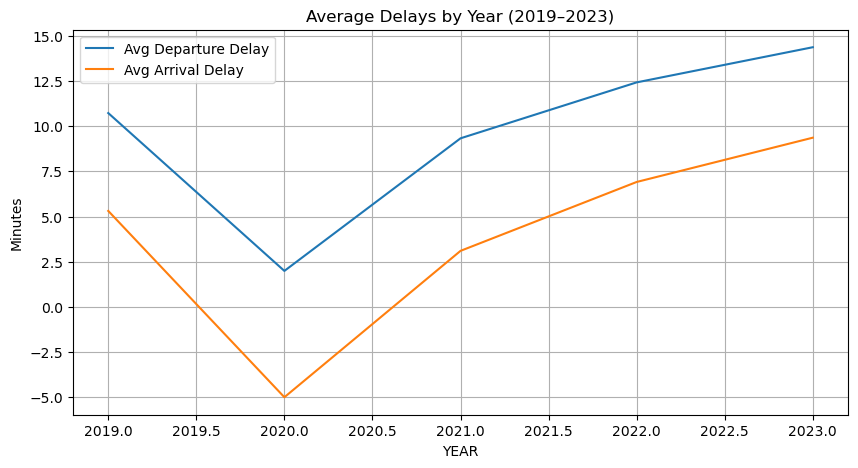

In [26]:
# Yearly Delay Trend
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
df['YEAR'] = df['FL_DATE'].dt.year

yearly_delays = df.groupby('YEAR')[['DEP_DELAY', 'ARR_DELAY']].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_delays, x='YEAR', y='DEP_DELAY', label='Avg Departure Delay')
sns.lineplot(data=yearly_delays, x='YEAR', y='ARR_DELAY', label='Avg Arrival Delay')
plt.title('Average Delays by Year (2019–2023)')
plt.ylabel('Minutes')
plt.grid(True)
plt.show()

The analysis of yearly averages reveals a significant post-COVID rise in both departure and arrival delays. In 2020, delays sharply declined due to the reduced flight volume and minimal congestion at the height of the pandemic. However, beginning in 2021, delays began to rise steadily each year.

By 2023, the average departure delay reached nearly 14.5 minutes, while arrival delays approached 10 minutes. This upward trend reflects the compounding impact of operational challenges such as staffing shortages, increased flight demand, and infrastructure strain as airlines attempted to scale back up.

These findings suggest that despite recovery in flight volume, airline operational performance has not yet stabilized to pre-pandemic levels. The delay increase signals the need for strategic improvements in scheduling efficiency, resource allocation, and real-time disruption management.

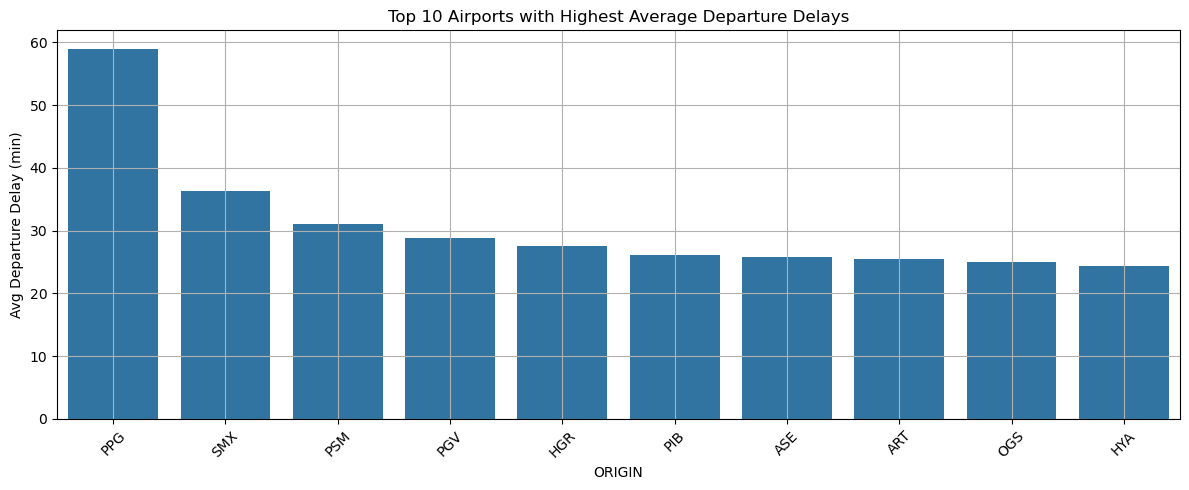

In [29]:
# Airport-Level Departure Delay Analysis
airport_perf = df.groupby('ORIGIN')[['DEP_DELAY']].mean().sort_values(by='DEP_DELAY', ascending=False).head(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=airport_perf.index, y='DEP_DELAY', data=airport_perf)
plt.title('Top 10 Airports with Highest Average Departure Delays')
plt.ylabel('Avg Departure Delay (min)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

This analysis identifies the airports with the highest average departure delays across the 2019–2023 period. The leading outlier is PPG (Pago Pago International Airport), with an average delay close to 60 minutes, far exceeding the others. It is followed by SMX (Santa Maria), PSM (Portsmouth), and PGV (Pitt–Greenville), all reporting average delays over 28 minutes.

While many of these airports serve regional or lower-volume routes, their disproportionately high delays could be attributed to limited infrastructure, inflexible schedules, or lower priority in national air traffic control sequencing.

For larger airlines operating through these airports, performance bottlenecks at the regional level can contribute to systemic network delays. Addressing these hotspots could involve better coordination with local airport authorities, enhanced buffer times, or reevaluation of routes during peak periods.

This insight supports a broader operational strategy focused on improving reliability at the network edge, where disruptions can ripple across the system.

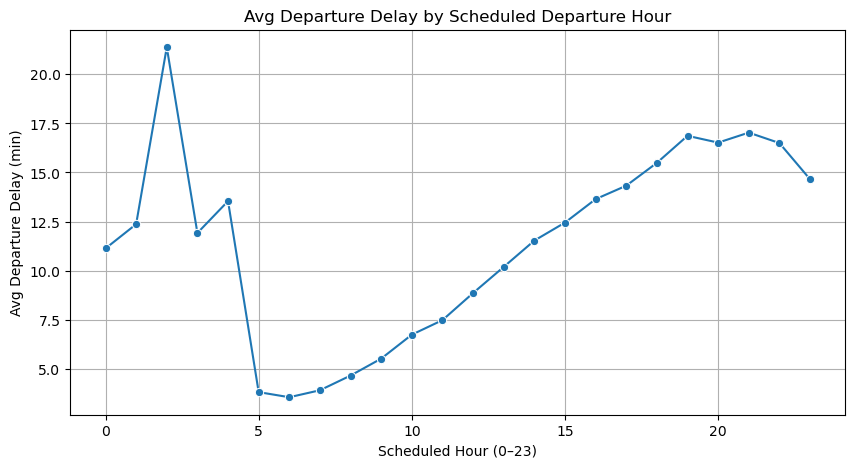

In [32]:
# Time-of-Day Analysis
df['DEP_HOUR'] = pd.to_numeric(df['CRS_DEP_TIME'], errors='coerce').floordiv(100)
hourly_delay = df.groupby('DEP_HOUR')['DEP_DELAY'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_delay, x='DEP_HOUR', y='DEP_DELAY', marker='o')
plt.title('Avg Departure Delay by Scheduled Departure Hour')
plt.xlabel('Scheduled Hour (0–23)')
plt.ylabel('Avg Departure Delay (min)')
plt.grid(True)
plt.show()


This time-of-day analysis reveals a clear pattern of delay accumulation over the course of the day. Flights departing in the early morning hours (5:00 AM to 7:00 AM) experience the lowest average delays, typically under 5 minutes, suggesting that operations begin the day on schedule.

However, delays begin to increase progressively after mid-morning, peaking between 6:00 PM and 9:00 PM, with average delays exceeding 17 minutes during these hours. The sharp spike around 3:00 AM may represent a data anomaly or misclassification from red-eye flights or irregular schedules.

The overall trend supports the industry-wide operational reality that delays compound throughout the day due to tight turnarounds, air traffic congestion, and downstream effects from earlier disruptions.

From a strategic standpoint, this finding underscores the value of scheduling high-priority or long-haul flights earlier in the day, while also recommending buffer time for evening flights and a resilient staffing model during peak hours.

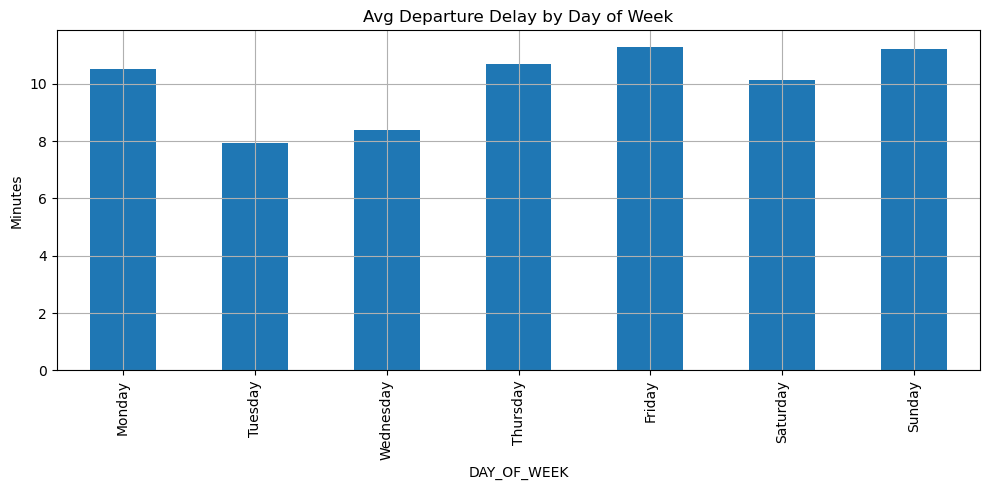

In [35]:
# Day-of-Week Analysis
df['DAY_OF_WEEK'] = df['FL_DATE'].dt.day_name()
dow_delay = df.groupby('DAY_OF_WEEK')['DEP_DELAY'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

dow_delay.plot(kind='bar', figsize=(10, 5), title='Avg Departure Delay by Day of Week')
plt.ylabel('Minutes')
plt.grid(True)
plt.tight_layout()
plt.show()


This analysis reveals notable variation in average departure delays across days of the week. Delays are lowest midweek—particularly on Tuesday (just under 8 minutes) and Wednesday, suggesting more efficient operations during lower-demand periods.

In contrast, Friday, Sunday, and Monday show the highest average delays, each exceeding 10.5 minutes. This aligns with industry trends where peak business travel (Mon/Fri) and leisure travel (Sun) increase demand and congestion. Additionally, tight aircraft rotations and weekend crew transitions may contribute to operational inefficiencies.

These findings suggest that airlines could improve performance by reinforcing staff and gate resources during high-volume travel days. It also offers an opportunity to incentivize flexible travelers to shift to midweek flights, reducing pressure on peak travel windows.

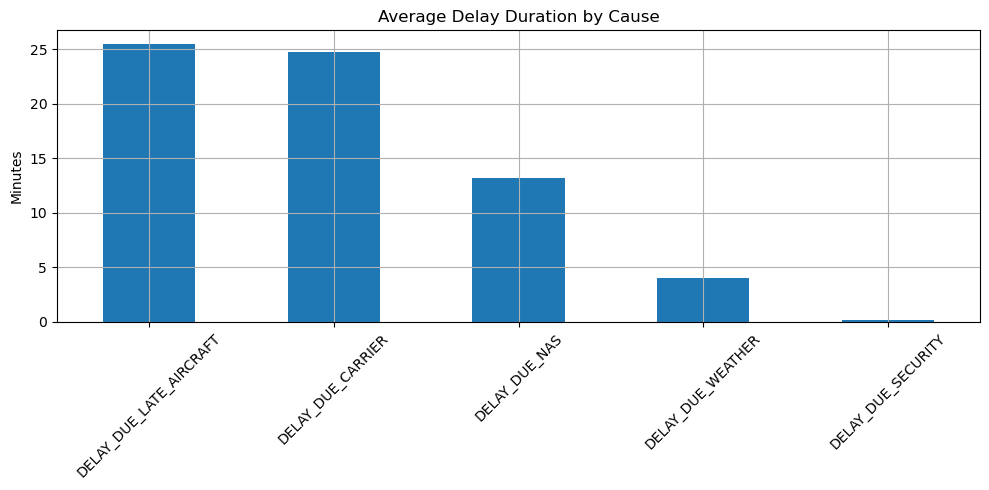

In [38]:
# Delay Cause Analysis
delay_causes = df[['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']]
mean_causes = delay_causes.mean().sort_values(ascending=False)

mean_causes.plot(kind='bar', figsize=(10, 5), title='Average Delay Duration by Cause')
plt.ylabel('Minutes')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()









This breakdown highlights the primary drivers of flight delays by average duration. The two most significant contributors are:

Late-arriving aircraft, averaging over 25 minutes of delay

Carrier-related issues (e.g., maintenance, crew readiness), averaging just under 25 minutes

These causes are often interconnected—late-arriving aircraft can cause a ripple effect across subsequent flights, particularly for tightly scheduled fleets. This underscores the need for better buffer time planning, dynamic reallocation of aircraft, and real-time rescheduling systems to minimize downstream impact.

Other causes like airspace delays (NAS) and weather contribute moderately, while security-related delays are negligible, averaging under 1 minute.

Strategically, these insights emphasize that carrier-controlled and schedule-dependent factors are the most actionable areas for performance improvement. Investments in AI-based delay prediction, schedule optimization, and turnaround efficiency would directly address the largest delay categories.

In [46]:
print(df['Cancelled_Flag'].value_counts())

Cancelled_Flag
0    2913802
Name: count, dtype: int64


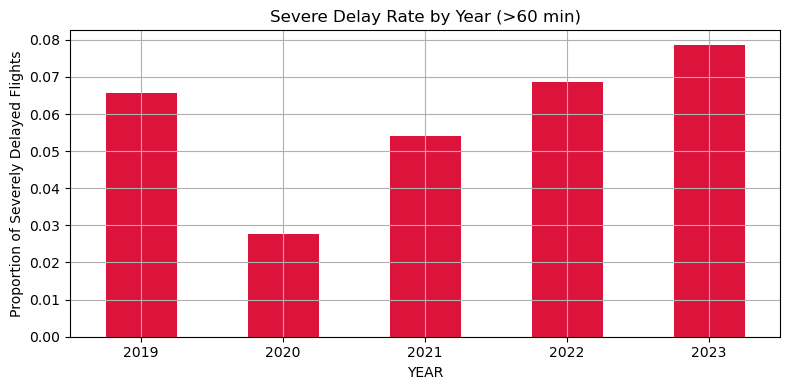

In [41]:
# Define severe delay as arrival delay over 60 minutes
df['Severe_Delay'] = (df['ARR_DELAY'] > 60).astype(int)

# Compute rate by year
severe_delay_rate = df.groupby('YEAR')['Severe_Delay'].mean()

# Plot
severe_delay_rate.plot(kind='bar', figsize=(8, 4), color='crimson', title='Severe Delay Rate by Year (>60 min)')
plt.ylabel('Proportion of Severely Delayed Flights')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


In the absence of cancellation data, we analyzed severely delayed flights, defined as those with arrival delays exceeding 60 minutes. This metric provides a strong proxy for disruption severity from a passenger and operational standpoint.

The results show a notable U-shaped pattern:

2020 had the lowest severe delay rate (~2.7%), reflecting reduced air traffic during the COVID-19 lockdowns.

However, from 2021 to 2023, the rate rose steadily, peaking at nearly 8% in 2023.

This trend highlights that while flight volume recovered post-pandemic, airlines struggled to keep up operationally, resulting in a growing share of major delays. The compounding effects of limited staffing, high demand, and constrained infrastructure likely contributed to this rise.

Strategically, these insights emphasize the importance of real-time disruption mitigation, schedule flexibility, and contingency capacity during peak recovery periods.